# Predicting the taxi-out time for an Aircraft based on Octave Data Analyst Recruitment Test

#### This notebook focus mainly on Exploratory Data Analysis and Feature Engineering. The data used for this analysis is downloaded from *Bureau of Transportation Statistics*

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import random


import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [2]:
df_January = pd.read_csv('C:/Users/Co/Desktop/python analysis/Airport_Analysis/January.csv')
df_February = pd.read_csv('C:/Users/Co/Desktop/python analysis/Airport_Analysis/February.csv')
df_March = pd.read_csv('C:/Users/Co/Desktop/python analysis/Airport_Analysis/March.csv')
df_April = pd.read_csv('C:/Users/Co/Desktop/python analysis/Airport_Analysis/April.csv')
df_May = pd.read_csv('C:/Users/Co/Desktop/python analysis/Airport_Analysis/May.csv')
df_June = pd.read_csv('C:/Users/Co/Desktop/python analysis/Airport_Analysis/June.csv')

In [3]:
print(df_January.shape)
df_January.head()

(583985, 56)


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,Unnamed: 55
0,2019,1,1,6,7,2019-01-06,9E,9E,N8694A,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2019,1,1,7,1,2019-01-07,9E,9E,N8970D,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,2019,1,1,8,2,2019-01-08,9E,9E,N820AY,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,2019,1,1,9,3,2019-01-09,9E,9E,N840AY,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,2019,1,1,10,4,2019-01-10,9E,9E,N8969A,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [4]:
print(df_February.shape)
df_February.head()

(533175, 56)


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,Unnamed: 55
0,2019,1,2,4,1,2019-02-04,AA,AA,N989AN,210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2019,1,2,5,2,2019-02-05,AA,AA,N346PR,210,...,0.0,16.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN
2,2019,1,2,6,3,2019-02-06,AA,AA,N872NN,210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,2019,1,2,7,4,2019-02-07,AA,AA,N316PF,210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,2019,1,2,8,5,2019-02-08,AA,AA,N855NN,210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [5]:
print(df_March.shape)
df_March.head()

(632074, 56)


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,Unnamed: 55
0,2019,1,3,21,4,2019-03-21,9E,9E,N8943A,3497,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2019,1,3,22,5,2019-03-22,9E,9E,N8688C,3497,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,2019,1,3,23,6,2019-03-23,9E,9E,N840AY,3497,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,2019,1,3,17,7,2019-03-17,9E,9E,N279PQ,5271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,2019,1,3,18,1,2019-03-18,9E,9E,N906XJ,5271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [6]:
print(df_April.shape)
df_April.head()

(612023, 56)


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,Unnamed: 55
0,2019,2,4,5,5,2019-04-05,NK,NK,N646NK,779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2019,2,4,6,6,2019-04-06,NK,NK,N615NK,779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,2019,2,4,7,7,2019-04-07,NK,NK,N633NK,779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,2019,2,4,8,1,2019-04-08,NK,NK,N655NK,779,...,0.0,47.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN
4,2019,2,4,9,2,2019-04-09,NK,NK,N605NK,779,...,0.0,85.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN


In [7]:
print(df_May.shape)
df_May.head()

(636390, 56)


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,Unnamed: 55
0,2019,2,5,28,2,2019-05-28,YX,YX,N732YX,3700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2019,2,5,28,2,2019-05-28,YX,YX,N652RW,3701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,2019,2,5,28,2,2019-05-28,YX,YX,N862RW,3702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,2019,2,5,28,2,2019-05-28,YX,YX,N862RW,3703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,2019,2,5,28,2,2019-05-28,YX,YX,N732YX,3705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [8]:
print(df_June.shape)
df_June.head()

(636691, 56)


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,Unnamed: 55
0,2019,2,6,1,6,2019-06-01,B6,B6,N929JB,620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2019,2,6,1,6,2019-06-01,B6,B6,N981JT,623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,2019,2,6,1,6,2019-06-01,B6,B6,N969JT,624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,2019,2,6,1,6,2019-06-01,B6,B6,N339JB,626,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,2019,2,6,1,6,2019-06-01,B6,B6,N997JL,629,...,0.0,0.0,0.0,39.0,NaN,NaN,NaN,0,NaN,NaN


In [9]:
#combine all the datasets
df_total = pd.concat([df_January, df_February, df_March, df_April, df_May, df_June], axis=0)
df_total.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,Unnamed: 55
0,2019,1,1,6,7,2019-01-06,9E,9E,N8694A,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2019,1,1,7,1,2019-01-07,9E,9E,N8970D,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,2019,1,1,8,2,2019-01-08,9E,9E,N820AY,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,2019,1,1,9,3,2019-01-09,9E,9E,N840AY,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,2019,1,1,10,4,2019-01-10,9E,9E,N8969A,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [10]:
df_total.reset_index(drop=True, inplace=True)

In [11]:
df_total

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,Unnamed: 55
0,2019,1,1,6,7,2019-01-06,9E,9E,N8694A,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2019,1,1,7,1,2019-01-07,9E,9E,N8970D,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,2019,1,1,8,2,2019-01-08,9E,9E,N820AY,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,2019,1,1,9,3,2019-01-09,9E,9E,N840AY,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,2019,1,1,10,4,2019-01-10,9E,9E,N8969A,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634333,2019,2,6,18,2,2019-06-18,AA,AA,N737US,2946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3634334,2019,2,6,19,3,2019-06-19,AA,AA,N8001N,2946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3634335,2019,2,6,20,4,2019-06-20,AA,AA,N9023N,2946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3634336,2019,2,6,21,5,2019-06-21,AA,AA,N974AN,2946,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN


## Understanding the Datasets

In [12]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3634338 entries, 0 to 3634337
Data columns (total 56 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   int64  
 1   QUARTER                int64  
 2   MONTH                  int64  
 3   DAY_OF_MONTH           int64  
 4   DAY_OF_WEEK            int64  
 5   FL_DATE                object 
 6   OP_UNIQUE_CARRIER      object 
 7   OP_CARRIER             object 
 8   TAIL_NUM               object 
 9   OP_CARRIER_FL_NUM      int64  
 10  ORIGIN_AIRPORT_ID      int64  
 11  ORIGIN_AIRPORT_SEQ_ID  int64  
 12  ORIGIN                 object 
 13  ORIGIN_CITY_NAME       object 
 14  ORIGIN_STATE_ABR       object 
 15  ORIGIN_STATE_FIPS      int64  
 16  ORIGIN_STATE_NM        object 
 17  DEST_AIRPORT_ID        int64  
 18  DEST_AIRPORT_SEQ_ID    int64  
 19  DEST                   object 
 20  DEST_CITY_NAME         object 
 21  DEST_STATE_ABR         object 
 22  DEST_STATE_FIPS   

## Column Definition

#### Let's define some columns for clarity and better understanding of selected features foe the analysis

#### **OP_CARRIER_FL_NUM** - Unique Carrier Code for reporting airline

#### **ORIGIN_AIRPORT_ID** - Origin Airport, Airport ID. An identification number assigned by US DOT to identify unique airport

#### **ORIGIN_CITY_NAME** - City name for origin airport

#### **ORIGIN_STATE_NM** - State name for origin airport

#### **DEST_AIRPORT_ID** - Destination Airport, Airport ID. An identification number assigned by US DOT to identify unique airport

#### **DEST_CITY_NAME** - City name for destination airport

#### **DEST_STATE_NM** - State name for destination airport

#### **TAXI_OUT** - Time between the actual pushback and wheels-off

#### **TAXI_IN** - Time between the wheels-on and actual pushback or time difference between Actual in-block time minus Actual landing time

In [13]:
df_total.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_STATE_FIPS,DEST_AIRPORT_ID,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,Unnamed: 55
count,3634338.0,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,3.634338e+06,...,719135.000000,719135.000000,719135.000000,719135.000000,25358.000000,25357.000000,25357.000000,3.634338e+06,10038.000000,0.0
mean,2019.0,1.518693e+00,3.576097e+00,1.565555e+01,3.949786e+00,2.541868e+03,1.265197e+04,1.265201e+06,2.697664e+01,1.265186e+04,...,4.106054,16.633123,0.108811,27.716438,1337.364382,39.775131,39.142682,4.133628e-03,0.836820,NaN
std,0.0,4.996505e-01,1.703839e+00,8.722514e+00,1.982340e+00,1.810177e+03,1.522622e+03,1.522620e+05,1.645408e+01,1.522574e+03,...,33.886872,39.018400,4.093113,53.689881,511.007712,34.505476,33.292208,1.223664e-01,0.369548,NaN
min,2019.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.013500e+04,1.013505e+06,1.000000e+00,1.013500e+04,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,NaN
25%,2019.0,1.000000e+00,2.000000e+00,8.000000e+00,2.000000e+00,1.004000e+03,1.129200e+04,1.129202e+06,1.200000e+01,1.129200e+04,...,0.000000,0.000000,0.000000,0.000000,858.000000,17.000000,17.000000,0.000000e+00,1.000000,NaN
50%,2019.0,2.000000e+00,4.000000e+00,1.600000e+01,4.000000e+00,2.129000e+03,1.288900e+04,1.288903e+06,2.600000e+01,1.288900e+04,...,0.000000,3.000000,0.000000,3.000000,1344.000000,29.000000,29.000000,0.000000e+00,1.000000,NaN
75%,2019.0,2.000000e+00,5.000000e+00,2.300000e+01,6.000000e+00,3.886000e+03,1.393100e+04,1.393102e+06,4.200000e+01,1.393100e+04,...,0.000000,20.000000,0.000000,34.000000,1747.000000,49.000000,49.000000,0.000000e+00,1.000000,NaN
max,2019.0,2.000000e+00,6.000000e+00,3.100000e+01,7.000000e+00,7.933000e+03,1.621800e+04,1.621802e+06,7.800000e+01,1.621800e+04,...,1521.000000,1741.000000,1078.000000,2206.000000,2400.000000,375.000000,270.000000,9.000000e+00,1.000000,NaN


In [14]:
num_col = df_total.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df_total.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_STATE_FIPS', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_STATE_FIPS', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'CANCELLED',
       'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'FIRST_DEP_TIME', 'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME',
       'DIV_AIRPORT_LANDINGS', 'DIV_REACHED_DEST', 'Unnamed: 55'],
      dtype='object')
Categorical columns: 
 Index(['FL_DATE', 'OP_UNIQUE_CARRIER', 'OP_CARRIER', 'TAIL_NUM', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST',
       

In [15]:
df_total.isnull().sum()

YEAR                           0
QUARTER                        0
MONTH                          0
DAY_OF_MONTH                   0
DAY_OF_WEEK                    0
FL_DATE                        0
OP_UNIQUE_CARRIER              0
OP_CARRIER                     0
TAIL_NUM                   12641
OP_CARRIER_FL_NUM              0
ORIGIN_AIRPORT_ID              0
ORIGIN_AIRPORT_SEQ_ID          0
ORIGIN                         0
ORIGIN_CITY_NAME               0
ORIGIN_STATE_ABR               0
ORIGIN_STATE_FIPS              0
ORIGIN_STATE_NM                0
DEST_AIRPORT_ID                0
DEST_AIRPORT_SEQ_ID            0
DEST                           0
DEST_CITY_NAME                 0
DEST_STATE_ABR                 0
DEST_STATE_FIPS                0
DEST_STATE_NM                  0
CRS_DEP_TIME                   0
DEP_TIME                   82762
DEP_DELAY                  82782
DEP_DELAY_NEW              82782
TAXI_OUT                   84726
WHEELS_OFF                 84726
WHEELS_ON 

In [103]:
# # Missing values mean the incident never occured and can be replaced with 0
# for i in df.columns:
#     df[i].fillna(0, inplace = True)

## Exploratory Data Analysis

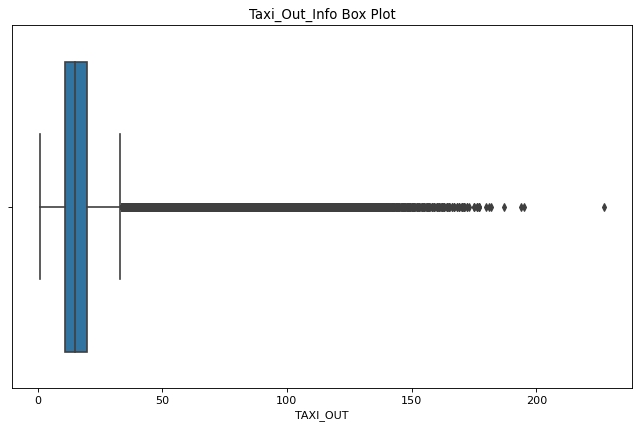

In [17]:
# Let's check the distribution of y variable (Life Expectancy)
plt.figure(figsize=(10,6), dpi= 80)
sns.boxplot(df_total['TAXI_OUT'])
plt.title('Taxi_Out_Info Box Plot')
plt.show()

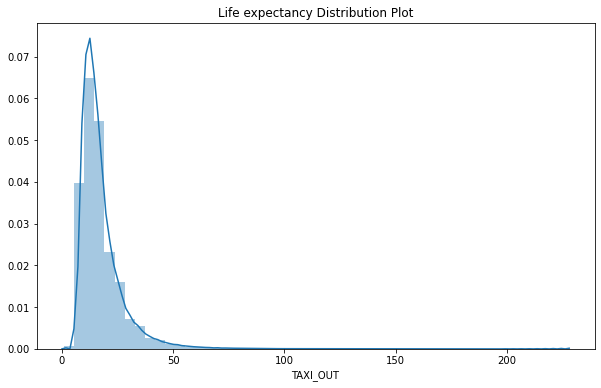

In [18]:
plt.figure(figsize=(10,6))
plt.title('Life expectancy Distribution Plot')
sns.distplot(df_total['TAXI_OUT'])
plt.show()

##### The y-variable has few outliers. We can still assume linear regression holds true here

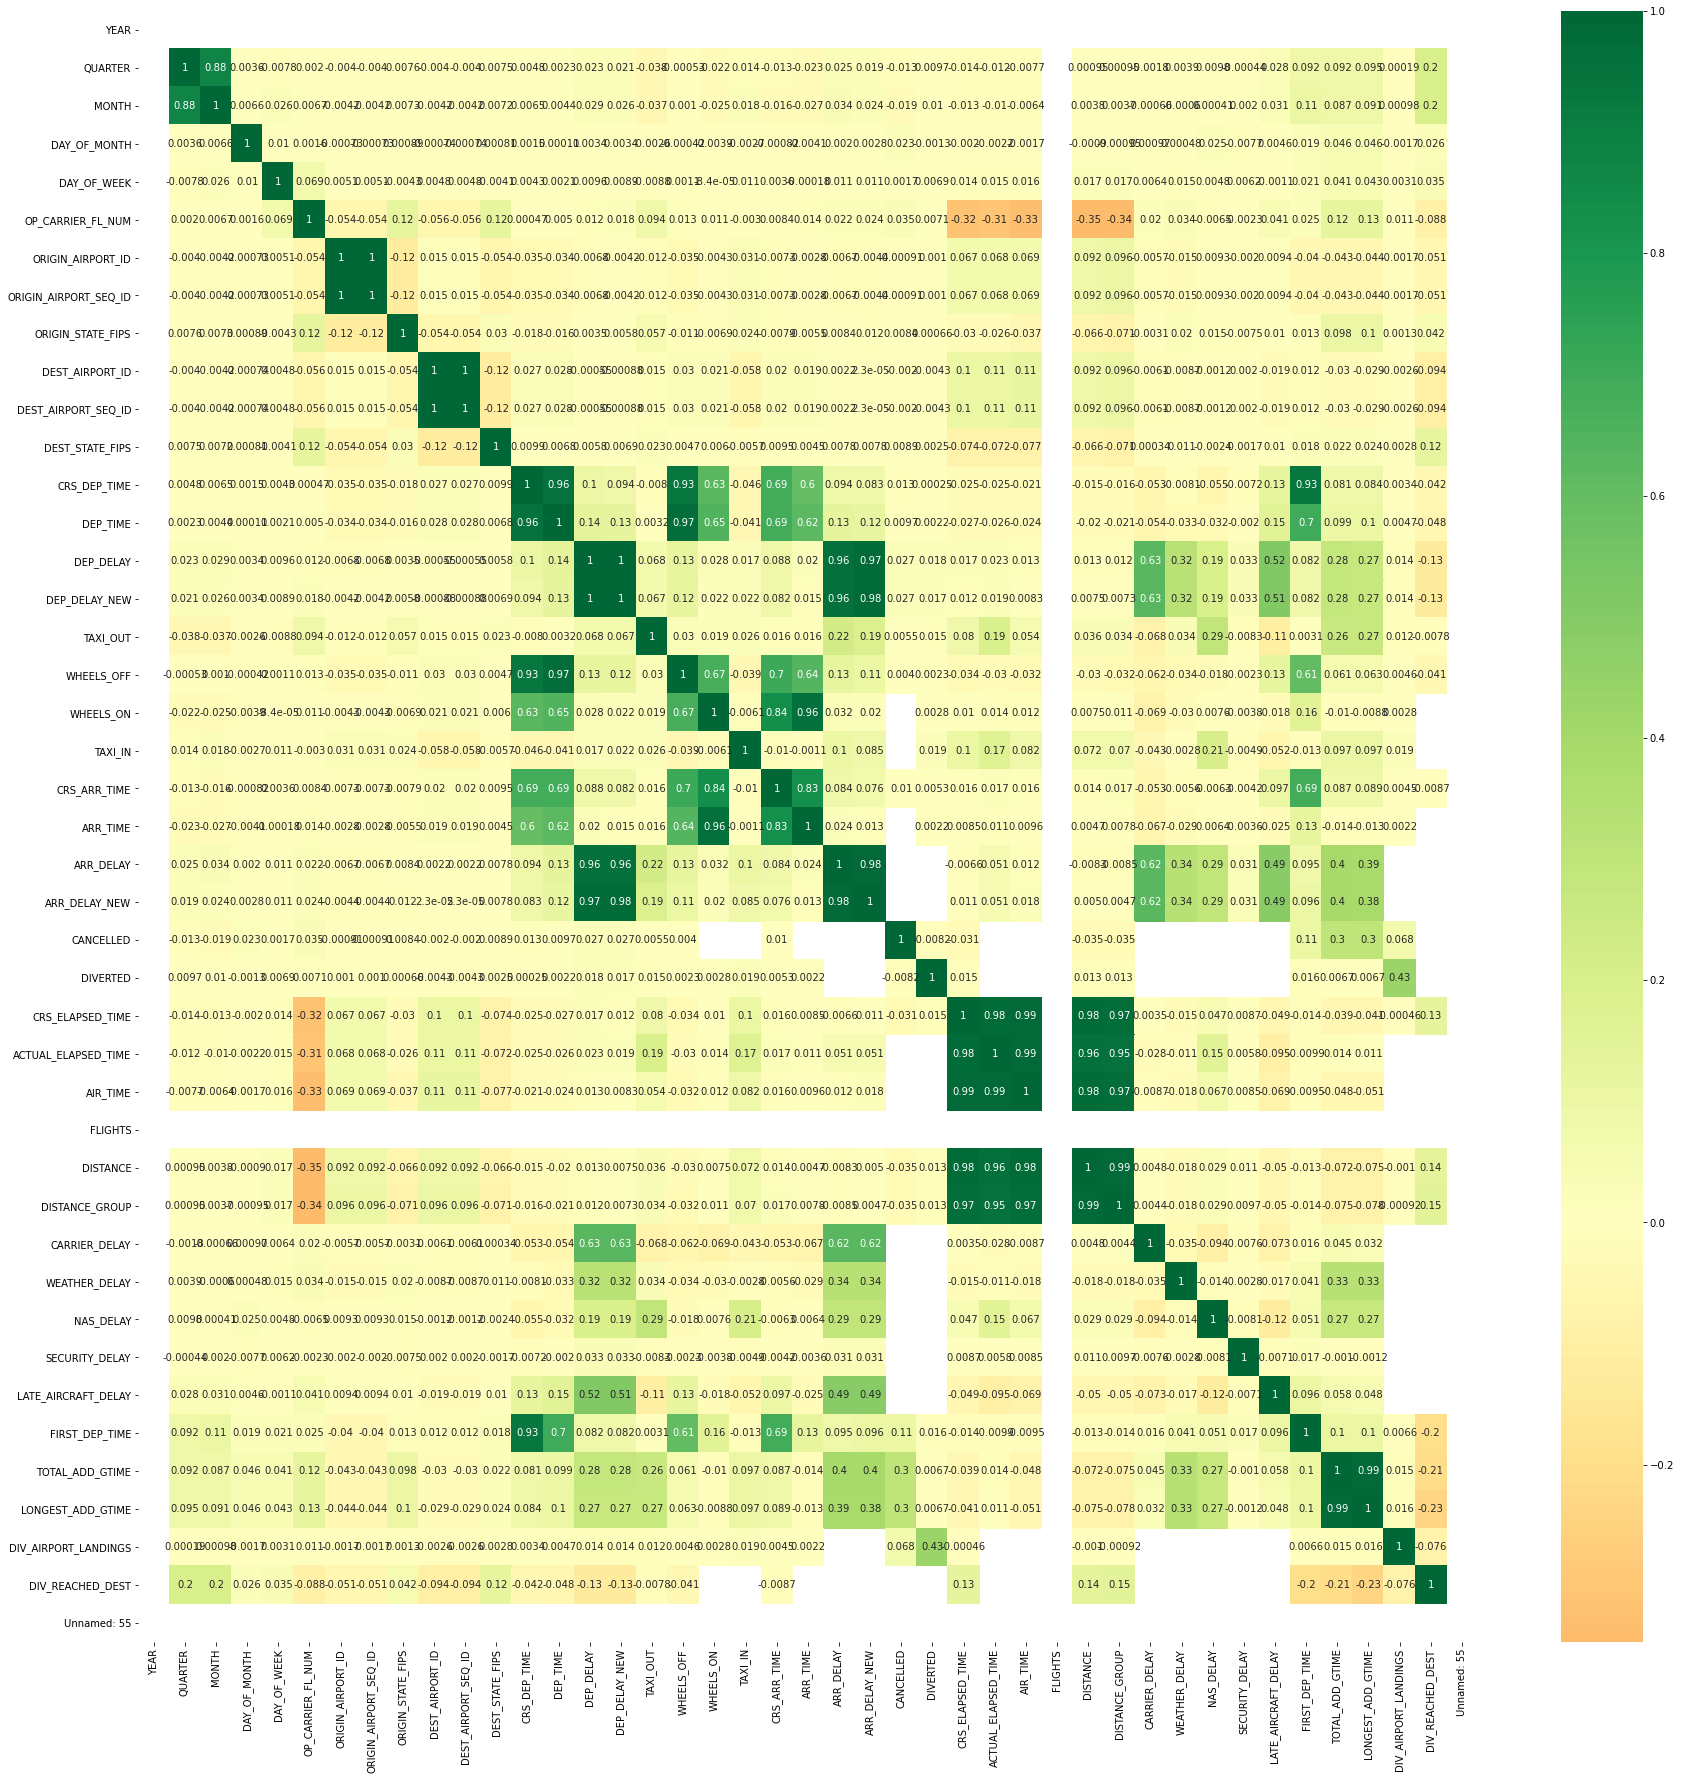

In [19]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(30,30))
p=sns.heatmap(df_total[num_col].corr(), annot=True,cmap='RdYlGn',center=0) 

In [20]:
# Seperate cancelled flights from the data for analysis. We assume that departure time is null
df_cancel_flights = df_total[df_total['DEP_TIME'].isnull()]
df_cancel_flights 

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,Unnamed: 55
130,2019,1,1,29,2,2019-01-29,9E,9E,N8986B,3282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
270,2019,1,1,29,2,2019-01-29,9E,9E,N903XJ,3285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
338,2019,1,1,29,2,2019-01-29,9E,9E,N903XJ,3287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
836,2019,1,1,29,2,2019-01-29,9E,9E,N8986B,3299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
974,2019,1,1,29,2,2019-01-29,9E,9E,N924XJ,3302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634239,2019,2,6,23,7,2019-06-23,AA,AA,N980UY,2944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3634247,2019,2,6,6,4,2019-06-06,AA,AA,N915US,2945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3634272,2019,2,6,6,4,2019-06-06,AA,AA,N915US,2945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3634297,2019,2,6,7,5,2019-06-07,AA,AA,N8031M,2946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [21]:
#len(df_cancel_flights)
print('Total number of cancelled flights for the 1H of 2019 is:', len(df_cancel_flights))

Total number of cancelled flights for the 1H of 2019 is: 82762


In [22]:
# working with dataframe of flights not cancelled
df_new = df_total[df_total['DEP_TIME'].notnull()]
df_new.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,Unnamed: 55
0,2019,1,1,6,7,2019-01-06,9E,9E,N8694A,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2019,1,1,7,1,2019-01-07,9E,9E,N8970D,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,2019,1,1,8,2,2019-01-08,9E,9E,N820AY,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,2019,1,1,9,3,2019-01-09,9E,9E,N840AY,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,2019,1,1,10,4,2019-01-10,9E,9E,N8969A,3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [23]:
#len(df_new)
print('Total number of flights not cancelled for the 1H of 2019 is:', len(df_new))

Total number of flights not cancelled for the 1H of 2019 is: 3551576


##### Working with successful flight travel for the related questions below

### Q1. Airline with the most number of flights in 1Q of 2019

In [24]:
air_flights = df_new[df_new['QUARTER'] == 1]

WN    316486
DL    224944
AA    224115
OO    187951
UA    142786
YX     74440
MQ     72159
B6     71053
OH     66978
AS     59950
9E     59757
YV     52282
NK     45520
EV     35692
F9     27828
G4     24130
HA     19664
Name: OP_UNIQUE_CARRIER, dtype: int64


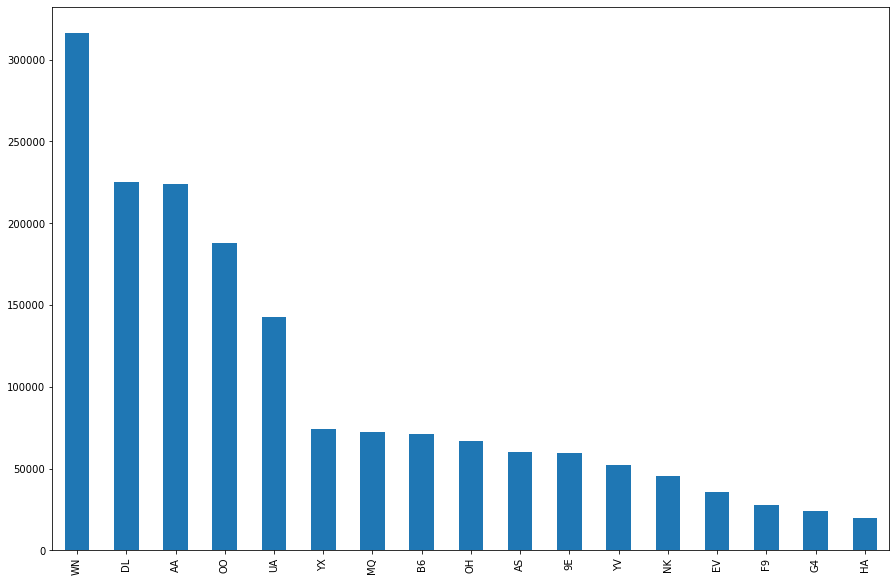

In [25]:
print(air_flights['OP_UNIQUE_CARRIER'].value_counts())

plt.figure(figsize=(15, 10))
air_flights['OP_UNIQUE_CARRIER'].value_counts().plot(kind='bar')
plt.show()

##### WN (Southwest Airlines Co.) airline has the most number of flights in 1Q of 2019. This may be attributed to the fact that Southwest Airlines Co. has an extremely efficient operations, low-cost pricing, and innovative logistics solutions

### Q2. Total number of airline Travels in 1Q of 2019

In [26]:
#len(air_flights)

print('Total number of airline travels in 1Q of 2019 is:', len(air_flights))

Total number of airline travels in 1Q of 2019 is: 1705735


### Q3. Total airtime by all airlines in May 2019

In [27]:
df_may_2019 = df_new[df_new['MONTH'] == 5]

In [28]:
df_may_2019['AIR_TIME'].sum()

69297104.0

In [29]:
print('Total airtime by all airlines in May 2019 is {} minutes'.format(df_may_2019['AIR_TIME'].sum()))

Total airtime by all airlines in May 2019 is 69297104.0 minutes


### Q4. Busiest City in April, 2019

In [30]:
df_april_2019 = df_new[df_new['MONTH'] == 4]

In [31]:
df_april_2019['DEST_CITY_NAME'].value_counts()

Chicago, IL              33003
Atlanta, GA              32682
New York, NY             24544
Dallas/Fort Worth, TX    22933
Houston, TX              19252
                         ...  
Pago Pago, TT                9
Branson, MO                  8
Adak Island, AK              8
Hayden, CO                   2
Gunnison, CO                 1
Name: DEST_CITY_NAME, Length: 344, dtype: int64

##### Chicago, IL has the highest number of destinations for airline travel in April, 2019. Hence the busiest

### Q5. Airline covered the most distance in June, 2019

In [32]:
df_june_2019 = df_new[df_new['MONTH'] == 6]

In [33]:
df_june_2019.groupby(['OP_UNIQUE_CARRIER'])['DISTANCE'].sum().sort_values(ascending=False)

OP_UNIQUE_CARRIER
WN    83675378.0
DL    79526511.0
AA    77597588.0
UA    65600409.0
OO    35228004.0
AS    30651350.0
B6    26888666.0
NK    17287540.0
YX    16425138.0
MQ    12452757.0
F9    11595411.0
YV    10557821.0
9E     9753424.0
OH     9699411.0
G4     9245872.0
HA     5308353.0
EV     4152290.0
Name: DISTANCE, dtype: float64

##### WN Airline had the highest travel distance for the month of June in 2019 with 83675378 miles covered

### Q6. Tail number of aircraft that covered most distance in 2Q of 2019

In [34]:
air_flights_2 = df_new[df_new['QUARTER'] == 2]

In [35]:
air_flights_2.groupby(['TAIL_NUM'])['DISTANCE'].sum().sort_values(ascending=False)

TAIL_NUM
N934JB    598286.0
N943JT    592006.0
N984JB    588931.0
N982JB    585632.0
N935JB    581559.0
            ...   
N861NW       528.0
N858NW       528.0
N271AY       449.0
N270AY       449.0
N684RW       224.0
Name: DISTANCE, Length: 5557, dtype: float64

##### N934JB covered the most distance in Q2 of 2019

### Q7. State with most delays recorded in Q2 of 2019

In [36]:
# Add all typres of recorded delays
air_flights_2['TOTAL_DELAY'] = air_flights_2['CARRIER_DELAY'] + air_flights_2['WEATHER_DELAY'] + air_flights_2['NAS_DELAY'] + air_flights_2['SECURITY_DELAY'] + air_flights_2['LATE_AIRCRAFT_DELAY']

In [37]:
air_flights_2.groupby(['ORIGIN'])['TOTAL_DELAY'].sum().sort_values(ascending=False)

ORIGIN
ORD    1639598.0
DFW    1494536.0
ATL    1218418.0
DEN    1088732.0
IAH     969184.0
         ...    
ADK        313.0
SPN        277.0
GST        175.0
DLG        123.0
AKN          0.0
Name: TOTAL_DELAY, Length: 358, dtype: float64

### Q8. Daily Average taxi out in New York, February 2019

In [38]:
df_february_2019 = df_new[df_new['MONTH'] == 2]

In [41]:
df_feb_NY = df_february_2019[df_february_2019['ORIGIN_STATE_NM'] == 'New York' ]
df_feb_NY

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,Unnamed: 55
584475,2019,1,2,14,4,2019-02-14,AA,AA,N352PS,231,...,0.0,19.0,0.0,22.0,NaN,NaN,NaN,0,NaN,NaN
584476,2019,1,2,15,5,2019-02-15,AA,AA,N871NN,231,...,0.0,0.0,0.0,40.0,NaN,NaN,NaN,0,NaN,NaN
584477,2019,1,2,16,6,2019-02-16,AA,AA,N867NN,231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
584478,2019,1,2,17,7,2019-02-17,AA,AA,N985NN,231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
584479,2019,1,2,18,1,2019-02-18,AA,AA,N855NN,231,...,0.0,56.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116599,2019,1,2,23,6,2019-02-23,OO,OO,N278SY,4559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1116633,2019,1,2,23,6,2019-02-23,OO,OO,N934SW,5027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1116719,2019,1,2,23,6,2019-02-23,OO,OO,N164SY,5193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1117000,2019,1,2,23,6,2019-02-23,OO,OO,N943SW,5511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [43]:
df_feb_NY['TAXI_OUT'].mean()

24.689726862140656

### Q9. Airline with New York destinates were diverted in 1Q of 2019

In [47]:
#air_flights = df_new[df_new['QUARTER'] == 1]
df_NY_1Q = air_flights[air_flights['DEST_STATE_NM'] == 'New York']
df_NY_1Q.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,Unnamed: 55
76,2019,1,1,5,6,2019-01-05,9E,9E,N324PQ,3281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
77,2019,1,1,12,6,2019-01-12,9E,9E,N313PQ,3281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
78,2019,1,1,19,6,2019-01-19,9E,9E,N927XJ,3281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
79,2019,1,1,20,7,2019-01-20,9E,9E,N932XJ,3281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
80,2019,1,1,26,6,2019-01-26,9E,9E,N934XJ,3281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [50]:
df_NY_1Q['DIVERTED'].sum()

260.0

### Q10. Delays more Rampant in Washington in 1H of 2019

In [86]:
df_washington_2019 = df_new[df_new['ORIGIN_STATE_NM'] == 'Washington']
df_washington_2019.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,Unnamed: 55
5743,2019,1,1,13,7,2019-01-13,WN,WN,N243WN,4277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
5744,2019,1,1,13,7,2019-01-13,WN,WN,N8687A,4939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
5745,2019,1,1,13,7,2019-01-13,WN,WN,N8577Z,5324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
5746,2019,1,1,13,7,2019-01-13,WN,WN,N909WN,3162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
5747,2019,1,1,13,7,2019-01-13,WN,WN,N7838A,3635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [87]:
df_washington_delay = df_washington_2019[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

In [88]:
df_washington_delay.columns.to_list()

['CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY']

In [102]:
for i in df_washington_delay.columns:
    print(df_washington_delay[i].sum())

230277.0
59108.0
238556.0
988.0
242206.0


##### Late Aircraft Delay has the most rampant delays for washington in 1H of 2019